# Project Title: Data Analyst Jobs Scraping, Analysis and Visualization

## Purpose

It was exciting to start a career in data analysis, but I had a lot of questions. In addition to the various job categories included in the relatively broad field of "data science," I want to find out which regions of the world has the highest data analyst job demand, which would result in higher pay and better working conditions. What distinguishes working as a data analyst as an entry, junior, or senior levels in a company. We will also observe the requirements needed to be hired in any of the job levels.

 We will investigate the highest-earning data analyst by job title and examine their relationships to factors such as Required skills, experience level, location, and other factors.
To better convey the results, the findings are visualized. The data will be appropriately analyzed, cleaned, and formatted in order to accomplish this goal.
This EDA project's insights can help many people who want to work in the data industry make better decisions.

## Problem Statement

The goal of this project is to identify the skills that are required for positions in the data analyst related field, establish a hierarchy and pair those skills up.

We Will be answering the following questions in thi project;

    Which skills are the most demanded among big companies?
    Which Companies has most data analysis positions ?
    Where are most data analysis position found?
    What is an estimated salary of a data analyst by level (Executive, Entry, Junior, Sinior)?
    How profitable it is to have a remote job over an onsite job?
    

## Web Scraping in Python

In this project section, I scraped a job posting portal, [ai-jobs.net](https://ai-jobs.net) for ** Data Analyst jobs**, using BeautifulSoup web scraping tool and Python Programming Language.

## Dataset Information

The data used for this study is obtained by aggregated data from ai-jobs.net, under this license.

* Job Ttile - The name of the available job
* Company Name - The name of the company with the job vacancy
* Location - It contains the Physical Location of the company and if the job is remote
* Level - It's the Job level, if it is a junior, mid or senior role
* Job Type - Is the job a full-time or internship role
* Salary Range - The pay range (some columns are in yearly range, while some are in hourly range)
* Required Skills - Necessary skills an applicant must have before applying
* Benefits - The benefits that comes with the job

In [216]:
#import needed libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd 
import urllib.parse 

In [217]:
#store website into a variable "webUrl"

webUrl = 'https://ai-jobs.net/analyst-jobs/'

In [218]:
#make request to the website specified above

response = requests.get(webUrl)

In [219]:
#confirm if the request made was successful

response.status_code

200

In [220]:
#create a soup object to get access to the html content of the website

soup = BeautifulSoup(response.content, 'html.parser')

In [221]:
soup

<!DOCTYPE html>

<html class="h-100" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots">
<meta content="All Analyst jobs - Find the latest AI/ML/Data Science jobs on ai-jobs.net." name="description"/>
<title>All Analyst jobs — Jobs in AI/ML and Big Data | ai-jobs.net</title>
<link href="/static/css/style_ai.min.css?v=1.4.1" rel="stylesheet"/>
<link href="/static/fa/css/all.min.css?v=5.13.0" rel="stylesheet"/>
<link href="https://ai-jobs.net/analyst-jobs/" rel="canonical"/>
<link href="https://insights.ai-jobs.net" rel="dns-prefetch"/>
<link href="https://salaries.ai-jobs.net" rel="dns-prefetch"/>
<link href="https://ai-jobs.net/feed/" rel="alternate" title="ai-jobs.net - Job feed" type="application/rss+xml"/>
<link href="/static/img/favicons_ai/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/

In [222]:
#start to store the website content in a variable 

results = soup.find('div', {'class':'list-group list-group-flush mb-5'}).find_all('a', {'class':'col list-group-item-action px-2 py-3'})

In [223]:
len(results)

100

#### Job Title

In [224]:
#pulling out content from each index of the list 

results[0].find('h2', {'class':'h4 mb-1'}).get_text()

'Senior Data Engineer - Analytic Platform'

#### Company

In [225]:
results[0].find('p', {'class':'m-0 text-muted job-list-item-company'}).get_text()

'StubHub'

### Location

In [226]:
results[0].find('span', {'class':'d-none d-md-block text-break job-list-item-location'}).get_text()

'Irvine, CA'

### Level

In [227]:
results[4].find('span', {'class':'badge badge-info badge-pill my-md-1 d-none d-md-inline-block'}).get_text()

'Senior-level'

### Job Type

In [228]:
results[0].find('span', {'class':'badge badge-secondary badge-pill my-md-1'}).get_text()

'Full Time'

### Salary Range

In [229]:
results[0].find('span', {'class':'badge badge-success badge-pill d-none d-md-inline-block'}).get_text()

'USD 76K - 150K *'

### Skills

In [230]:
[x.get_text() for x in results[0].find_all('span', 'badge badge-light badge-pill')]

['Airflow',
 'Data pipelines',
 'Data Warehousing',
 'Engineering',
 'Kafka',
 'Machine Learning',
 'Pipelines',
 '+5']

### Benefits

In [231]:
[i.get_text() for i in results[0].find_all('span', 'badge badge-success badge-pill')]

['Career development',
 'Health care',
 'Lunch / meals',
 'Startup environment',
 'Team events',
 '+1']

In [232]:
#create an empty list
Job_title = []
Company = []
Location = []
Level = []
Job_type = []
Salary = []
Skill = []
Benefit = []

In [233]:
#Create a for loop that will loop through the rows and append the data extracted to the list created
for result in results:
    try:
        Job_title.append(result.find('h2', {'class':'h4 mb-1'}).get_text()) 
    except:
        Job_title.append('n/a')
        
    try:
        Company.append(result.find('p', {'class':'m-0 text-muted job-list-item-company'}).get_text()) 
    except:
        Company.append('n/a')
        
    try:
        Location.append(result.find('span', {'class':'d-none d-md-block text-break job-list-item-location'}).get_text()) 
    except:
        Location.append('n/a')
        
    try:
        Level.append(result.find('span', {'class':'badge badge-info badge-pill my-md-1 d-none d-md-inline-block'}).get_text()) 
    except:
        Level.append('n/a')
        
    try:
        Job_type.append(result.find('span', {'class':'badge badge-secondary badge-pill my-md-1'}).get_text()) 
    except:
        Job_type.append('n/a')
    
    try:
        Salary.append(result.find('span', {'class':'badge badge-success badge-pill d-none d-md-inline-block'}).get_text()) 
    except:
        Salary.append('n/a')
    
    try:
        Skill.append([x.get_text() for x in result.find_all('span', 'badge badge-light badge-pill')])
    except:
        Skill.append('n/a')
    
    try:
        Benefit.append([x.get_text() for x in result.find_all('span', 'badge badge-success badge-pill')])
    except:
        Benefit.append('n/a')

In [234]:
#give column header names to each columns
analysts = pd.DataFrame({'Job Title': Job_title, 'Company': Company, 'Location': Location, 'Level': Level,
                        'Job Type': Job_type, 'Salary Range': Salary, 'Required Skills': Skill, 'Benefits': Benefit})

In [235]:
#export the dataframe to excel

analysts.to_excel('analyst.xlsx', index=False)

## Exploratory Data Analysis

### Importing Required Libraries for EDA

In [236]:
# data manipulation
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Understanding the data

In [237]:
df = analysts

In [238]:
df.head()

,Job Title,Company,Location,Level,Job Type,Salary Range,Required Skills,Benefits
0,Senior Data Engineer - Analytic Platform,StubHub,"Irvine, CA",Senior-level,Full Time,USD 76K - 150K *,"[Airflow, Data pipelines, Data Warehousing, En...","[Career development, Health care, Lunch / meal..."
1,Credit Analytics and Data Science Lead,Uncapped,"Warsaw, Masovian Voivodeship, Poland - Remote",Mid-level,Full Time,n/a,"[Credit risk, Finance, Machine Learning, ML mo...","[Career development, Competitive pay, Equity, ..."
2,Data Analytics Assistant,Publicis Groupe,"Warszawa, Poland",Entry-level,Full Time,n/a,"[Bitbucket, Data Analytics, Jira, Machine Lear...",[]
3,Data Analyst (TA-4160),Publicis Groupe,"Bogotá, Colombia",Mid-level,Full Time,USD 51K - 90K *,"[Business Intelligence, Data Analytics, Data m...","[Career development, Flex hours, Team events]"
4,(Senior) Digital Analytics Engineer,Netcentric,"Munich, Germany",Senior-level,Full Time,n/a,"[A/B testing, APIs, Computer Science, Engineer...","[Career development, Fitness / gym, Flex hours..."


.head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.

In [239]:
df.tail()

,Job Title,Company,Location,Level,Job Type,Salary Range,Required Skills,Benefits
95,Data Analyst - Compliance,PhonePe,Bengaluru,n/a,Full Time,USD 50K - 85K *,"[Banking, Data Analytics, Data visualization, ...","[Career development, Flex hours, Medical leave..."
96,Data Analytics Coach,Multiverse,"London, England, United Kingdom - Remote",Mid-level,Full Time,n/a,"[Data Analytics, Excel, PhD, Power BI, Python,...","[Career development, Equity, Health care, Insu..."
97,"Senior Data Scientist, Machine Learning - Game...",Rockstar Games,"Manhattan, New York, United States",Senior-level,Full Time,USD 68K - 135K *,"[Big Data, Classification, Computer Science, D...",[Career development]
98,BI Analyst,Darrow,Tel Aviv,Senior-level,Full Time,n/a,"[Business Intelligence, Data analysis, Data ma...","[Career development, Startup environment]"
99,Senior Data Analyst,DigitalOcean,United States and Canada,Senior-level,Full Time,USD 50K - 85K *,"[Computer Science, Economics, Engineering, Exc...","[Competitive pay, Conferences, Equity, Health ..."


In [240]:
df.shape

(100, 8)

.shape returns the number of rows by the number of columns for my dataset. The output (200, 8), means the dataset has 200 rows and 8 columns.

In [241]:
df.columns.values

array(['Job Title', 'Company', 'Location', 'Level', 'Job Type',
       'Salary Range', 'Required Skills', 'Benefits'], dtype=object)

.columns returns all 8 column names of the dataset.

In [242]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        100 non-null    object
 1   Company          100 non-null    object
 2   Location         100 non-null    object
 3   Level            100 non-null    object
 4   Job Type         100 non-null    object
 5   Salary Range     100 non-null    object
 6   Required Skills  100 non-null    object
 7   Benefits         100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


.info() provides Key information related to the dataset. 
8 columns, number of enteries (200 rows), and data types (objects)

### Cleaning the data

In [243]:
## Check for null values

df.isnull().sum()



Job Title          0
Company            0
Location           0
Level              0
Job Type           0
Salary Range       0
Required Skills    0
Benefits           0
dtype: int64

In [244]:
len(df)

100

### Univariate Analysis

In [245]:
## Top 20 Analytics Jobs

titles = df['Job Title'].value_counts()
titles = dict(titles)
list1 = titles.keys()
list2 = titles.values()
titles_df = pd.DataFrame(list(zip(list1,list2)), columns=['title','count'])
fig = px.bar(titles_df[0:20],y='title', x='count', text='count',orientation='h',
            labels={'count':'Count'}, color='count', color_continuous_scale = 'Viridis') 
fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Top 20 Analytics Jobs</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.6,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )
fig.update_xaxes(
        color='teal',
        title_text='Jobs',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        showgrid=False,
        tickmode='auto',
        linecolor='gray',
        linewidth=3,
        mirror=True)
fig.update_yaxes(
        color='Teal',
        title_text='Title',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        showgrid=False,
        linecolor='gray',
        linewidth=3,
        mirror = True)

In [246]:
## Top 20 Recriuting Companies 

companies = df['Company'].value_counts()
companies = dict(companies)
list1 = companies.keys()
list2 = companies.values()
companies_df = pd.DataFrame(list(zip(list1,list2)), columns=['company','count'])

fig = px.bar(companies_df[0:20],y='company', x='count', text='count',orientation='h',
            labels={'count':'Count'}, color='count', color_continuous_scale = 'Viridis') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Top 20 Recriuting Companies </b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.6,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Jobs',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        showgrid=False,
        linecolor='gray',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Company',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        showgrid=False,
        linecolor='gray',
        linewidth=3,
        mirror = True)


In [247]:
## Top Analytics Job Locations

locations = df['Location'].value_counts()
locations = dict(locations)
list1 = locations.keys()
list2 = locations.values()
locations_df = pd.DataFrame(list(zip(list1,list2)), columns=['locality','count'])
fig = px.bar(locations_df[0:20],y='locality', x='count', text='count',orientation='h',
            labels={'count':'Count'}, color='count', color_continuous_scale = 'Viridis') 
fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Top Analytics Job Locations </b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.6,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )
fig.update_xaxes(
        color='teal',
        title_text='Jobs',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        showgrid=False,
        tickmode='auto',
        linecolor='gray',
        linewidth=3,
        mirror=True)
fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        showgrid=False,
        linecolor='gray',
        linewidth=3,
        mirror = True)

### Bivariate Analysis

In [248]:
df.drop(df.loc[df["Level"] == "n/a"].index, inplace=True)

In [ ]:
sns.displot(df, x="Level", hue="Job Title",  shrink=.2)

In [ ]:
sns.displot(df, x="Job Type", hue="Company",  shrink=.2)

In [ ]:
df.drop(df.loc[df["Salary Range"] == "n/a"].index, inplace=True)

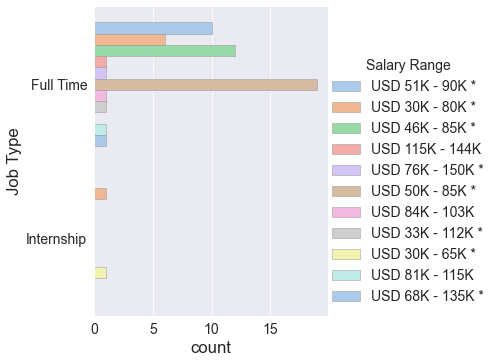

In [195]:
sns.catplot(
    data=df, y="Job Type", hue="Salary Range", kind="count",
    palette="pastel", edgecolor=".6",
)

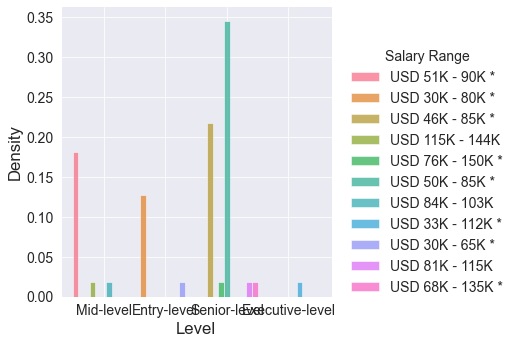

In [196]:
sns.displot(df, x="Level", hue="Salary Range", multiple="dodge", stat="density")

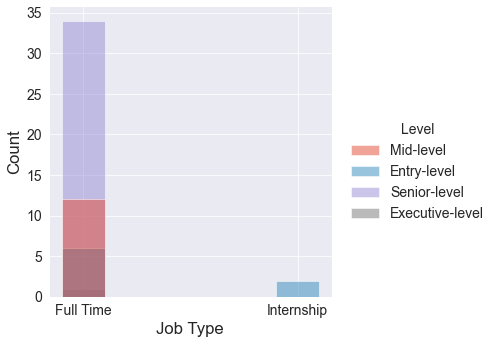

In [197]:
sns.displot(df, x="Job Type", hue="Level",  shrink=.2)

## Insights

In [215]:
# Insites from Comparing different Job sites


    -> Data analyst job percentage is the highest in the job portal we analyzed
    
    -> Visa and Bosch group has the most data analytics position, with a total of 4 each
    
    -> More Data scientist jobs are posted in New York city (United States) and Paris (France)
    
    -> Lowest salaries payed for Data analyst is 30k and Highest is 150K
    
    -> Full-time jobs are most paid. 
       
    -> Top 5 skills asked are Python, SQL, Tableau, Data Visualization, Excel.
    
     -> The more skillset you have, the more jobs you can apply for.

    

## Conclusion

A detailed data analysis is done from a scrapped dataset. It can be concluded that:

1. Data Analyst is one the most popular and emerging field.
2. Average salary of data analysts across the world were explored.
3. Salaries across type of employment such as Internship, Full-time, etc.
4. Salaries rise as you gain experience. 